# Content - Based Recommendation System for Music 

It compares item features (song audio features like tempo, energy, danceability, etc.) using similarity measures (like cosine similarity).

It does not rely on user interaction data (e.g. ratings, play counts, user preferences).

The assumption is: “If a user likes this song, they’ll like other songs that are similar in content.”

# basic steps / guidline for content based recommendation system 

1. Collect and Prepare the Data
   
    - You need a dataset of items (e.g. songs) with descriptive features.

    - Examples: For songs: tempo, energy, valence, danceability, etc.

2. Select or Engineer Features

    - Choose numeric features that best describe your items.

    - Normalize/scale them if needed

3. Compute Feature Vectors for Items

    - Each item (e.g. song) is represented as a vector in feature space.

    - You will compare these vectors for similarity.

    - Using cosine similarity from sklearn 

4. Define a Function to Get Similar Items

    - Take an input item (e.g. by name), extract its feature vector.

    - Compute cosine similarity with all other items.

    - Return the top N most similar items.


In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_palette("Set2")


from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [10]:
data = pd.read_csv(r'data/data.csv')
data_by_artist = pd.read_csv(r'data/data_by_artist.csv')
data_genres = pd.read_csv(r'data/data_by_genres.csv')
data_by_year = pd.read_csv(r'data/data_by_year.csv')

In [13]:
data.head()


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


we can group the features in data.csv into 2 different classes : one describing basic information about the song i.e id, name , artist year, release_data, duration_ms) and one class with the audio features i.e loudness , tempo , popularity , valence , acousticness

In [56]:
data_by_artist.head(10)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5
5,1,36,0.609556,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.487278,205091.944444,0.309906,0.004696,0.274767,-18.266389,0.098022,118.648944,0.441556,32.777778,5
6,1,2,0.725000,"""Mama"" Helen Teagarden",0.637000,135533.000000,0.512000,0.186000,0.426000,-20.615000,0.210000,134.819000,0.885000,0.000000,8
7,1,2,0.927000,"""Test for Victor Young""",0.734000,175693.000000,0.474000,0.076200,0.737000,-10.544000,0.256000,132.788000,0.902000,3.000000,10
8,1,122,0.173145,"""Weird Al"" Yankovic",0.662787,218948.196721,0.695393,0.000050,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9
9,1,15,0.544467,$NOT,0.789800,137910.466667,0.532933,0.023063,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1


In [15]:
data_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [16]:
data_by_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [17]:
data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


for "data" we can seperate features into different groups 
notice some features are between 0 -1 (or almost 1) so we can say they are normalised features 

In [21]:
song_info_features = ['name', 'artists', 'id', 'release_date', 'year', 'popularity']
song_features_normalized = ['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness']
song_features_not_normalized = ['duration_ms', 'key', 'loudness', 'mode', 'tempo']

In [22]:
# add a column of dacade to the dataset as music is often analysed in terms of decades 
data['decade'] = ((data['year'] - 1)//10)*10
data_by_year['decade'] = ((data_by_year['year'] - 1)//10)*10

## Diagrams and EDA

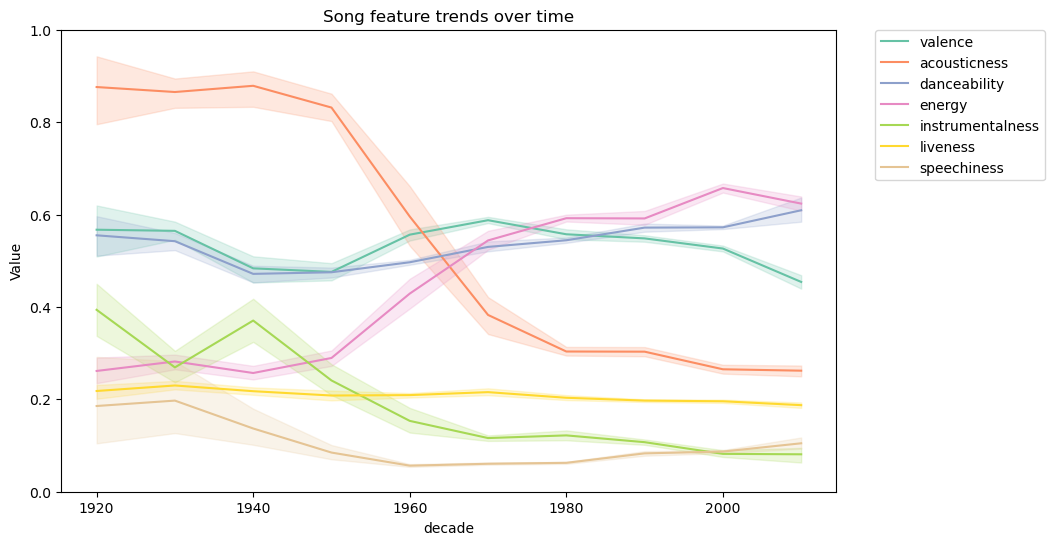

In [26]:
# how the song features change over time
plt.figure(figsize=(10, 6))
for feature in song_features_normalized:
    sns.lineplot(x='decade', y=feature, data=data_by_year, label=feature)
plt.ylabel('Value')
plt.ylim(0, 1)
plt.title('Song feature trends over time')
# set legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

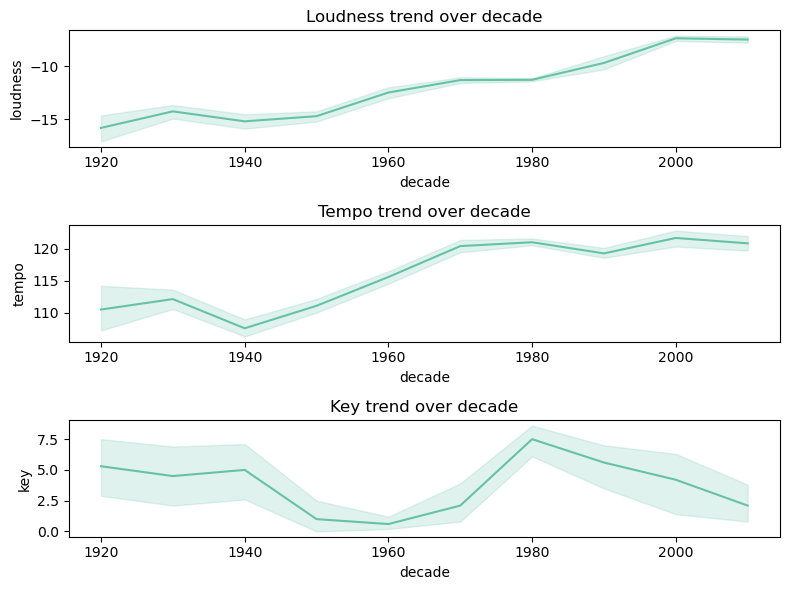

In [27]:
# plot the trends of loudness, tempo, key by year in subplots 
fig, axes = plt.subplots(3, 1, figsize=(8, 6))
sns.lineplot(x='decade', y='loudness', data=data_by_year, ax=axes[0])
sns.lineplot(x='decade', y='tempo', data=data_by_year, ax=axes[1])
sns.lineplot(x='decade', y='key', data=data_by_year, ax=axes[2])
axes[0].set_title('Loudness trend over decade')
axes[1].set_title('Tempo trend over decade')
axes[2].set_title('Key trend over decade')
plt.tight_layout()
plt.show()


In [32]:
# define song features
# features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
song_featues = song_features_normalized + song_features_not_normalized
# standardize the features
scaler = StandardScaler()
feature_for_cluster = scaler.fit_transform(data_genres[song_featues])

Standard scalar standardizes your data meaning it transforms it to have 
- mean =0
- standard deviation = 1

(note this is not the same as transforming it a standard normal distribution or normalising the data so all values are between 0 and 1)

we do this as it improves model accuracy and interpretability 

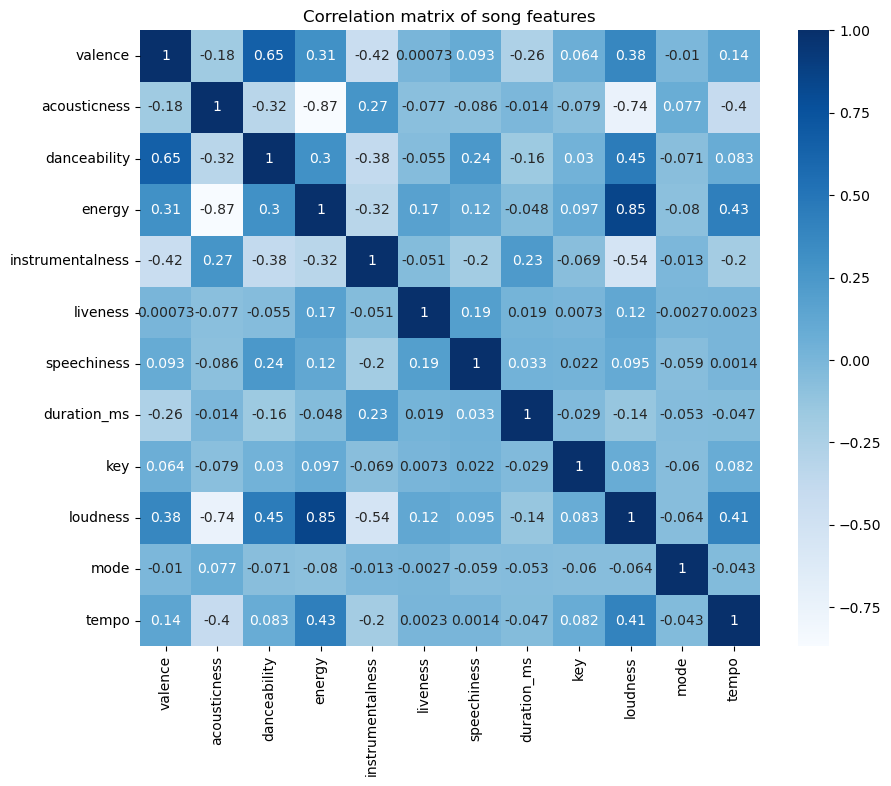

In [33]:
# make a correlation matrix of the song features
corr = np.corrcoef(feature_for_cluster.T)

# plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, 
            xticklabels=song_featues, yticklabels=song_featues, cmap='Blues')
plt.title('Correlation matrix of song features')
plt.show()

we can find there are strong correlations between some features hence we can try dimensionality reduction methods to reduce the dimension of the data set basically decrease the number of columns/ features 

In [35]:


# one way is to use Principal Component Analysis 
# pca = PCA(n_components=2)
# feature_for_cluster_dim_redu = pca.fit_transform(feature_for_cluster)

# another way is to use t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
feature_for_cluster_dim_redu = tsne.fit_transform(feature_for_cluster)

Clustering is an unsupervised machine learning technique that groups similar data points together into clusters, based on some notion of similarity (usually distance).

You give the algorithm raw data (no labels).

It finds natural groupings in that data.

Each group is called a cluster.

But first we want to pick the optimal no. clusters (not too few / too many hence we will use the elbow method)

The Elbow Method 

1. Run K-Means for different values of k (e.g., from 1 to 10).

2. For each k, record the Sum of Squared Distances (SSD) between each point and its assigned cluster center.
        - This is called inertia in sklearn.

3. Plot k vs. SSD.

The point where the rate of decrease sharply slows down is called the "elbow".
That’s your ideal number of clusters

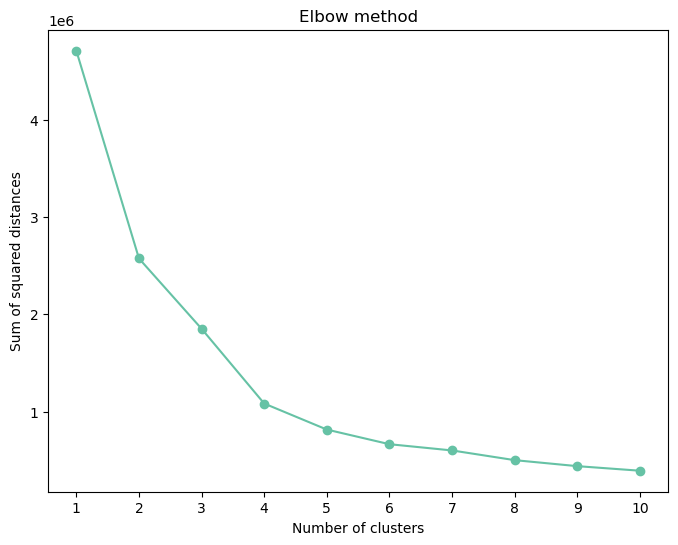

In [36]:
# use the elbow method to find the optimal number of clusters
# calculate the sum of squared distances for different number of cluster
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(feature_for_cluster_dim_redu)
    ssd.append(kmeans.inertia_)
# plot the sum of squared distances for different number of cluster
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method')
plt.show()

we can see the optimal no. clusters is 4 

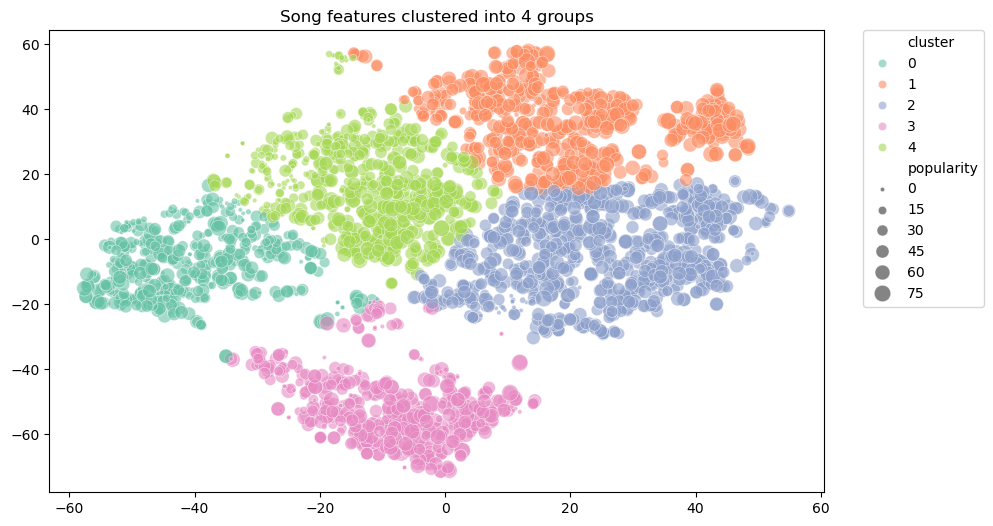

In [39]:
# cluster the features into 5 clusters using KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(feature_for_cluster_dim_redu)
# add the cluster labels to the dataset
data_genres['cluster'] = kmeans.labels_

# plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature_for_cluster_dim_redu[:, 0], y=feature_for_cluster_dim_redu[:, 1], 
                hue=data_genres['cluster'], palette='Set2', size=data_genres['popularity'], sizes=(10, 150), alpha=0.6)
# set legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Song features clustered into 4 groups')
plt.show()

In [41]:
# with the clusters, we find the top 5 popular genres in each cluster
popular_genres =data_genres.groupby('cluster')[['genres', 'popularity']].apply(
    lambda x: x.nlargest(5, columns=['popularity'])
).reset_index()
for i in range(5):
    print(f"Cluster {i} : {popular_genres.query('cluster == @i')['genres'].tolist()}")

Cluster 0 : ['irish indie', 'lo-fi house', 'shush', 'white noise', 'lo-fi chill']
Cluster 1 : ['basshall', 'south african house', 'trap venezolano', 'trap triste', 'urbano espanol']
Cluster 2 : ['circuit', 'guaracha', 'russian dance', 'trap chileno', 'japanese indie rock']
Cluster 3 : ['turkish edm', 'alberta hip hop', 'chinese electropop', 'afroswing', 'afro soul']
Cluster 4 : ['indie triste', 'guatemalan pop', 'rock chapin', 'chinese hip hop', 'modern indie pop']


In [44]:
# find the most central genre in each cluster

# calculate the distance between each genre and the cluster center
genre_cluster_center = []
for i in range(5):
    genre_cluster_center.append(data_genres.query('cluster == @i')[song_featues].mean().values)
genre_cluster_center = np.array(genre_cluster_center)

# calculate the distance between each genre and the cluster center
genre_cluster_center_dist = []
for i in range(5):
    genre_cluster_center_dist.append(np.linalg.norm(data_genres.query('cluster == @i')[song_featues].values - genre_cluster_center[i], axis=1))
genre_cluster_center_dist[0]  

# find the 5 most central genre in each cluster
central_genres = []
for i in range(5):
    central_genres.append(data_genres.query('cluster == @i')['genres'].iloc[np.argsort(genre_cluster_center_dist[i])[:5]].tolist())

for i in range(5):
    print(f"Cluster {i} : {central_genres[i]}")
    

Cluster 0 : ['hungarian classical performance', 'german jazz', 'wisconsin indie', 'barockinterpreten', 'opera']
Cluster 1 : ['baton rouge rap', 'pop peruano', 'k-rap', 'argentine reggae', 'musica alagoana']
Cluster 2 : ['british blues', 'liquid funk', 'oxford indie', 'j-pop', 'vancouver punk']
Cluster 3 : ['deep uplifting trance', 'finnish alternative rock', 'austropop', 'aussietronica', 'deep g funk']
Cluster 4 : ['tollywood', 'classic uk pop', 'chinese jazz', 'classic schlager', 'pop quebecois']


Goal : For each cluster, find the 5 songs (or genres) closest to the cluster center — i.e., the most "representative" or "central" genres of that cluster.

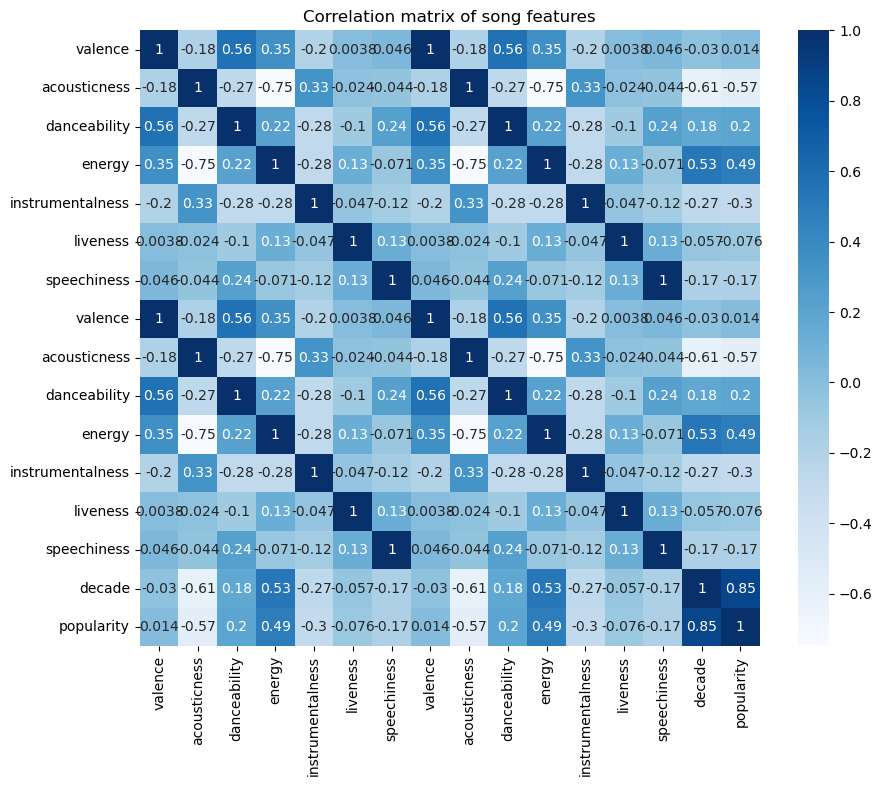

In [45]:
#make a correlation matrix of the song features, see what is more correlated with the popularity
all_features = song_features_normalized + song_features_normalized + ['decade', 'popularity']

# apply standardization to the features
scaler = StandardScaler()
feature_for_corr = scaler.fit_transform(data[all_features])

# make a correlation matrix
corr = np.corrcoef(feature_for_corr.T)

# plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, xticklabels=all_features, yticklabels=all_features, cmap='Blues')
plt.title('Correlation matrix of song features')
plt.show()

## Building Recommendation system 

Below we want to create a single dataset for our recommendation / ML model 

In [46]:
# define the features to be used in the recommendation system

# features = song_features_normalized + song_features_not_normalized
features = song_features_normalized + song_features_not_normalized + ['decade', 'popularity']

# make a new dataframe, apply standardization to the features
scaler = StandardScaler()
feature_for_recommendation = scaler.fit_transform(data[features])

# create a dataframe as a copy of the original dataframe and with the standardized features
data_recommendation = data.copy()
data_recommendation[features] = feature_for_recommendation

# turn all song names into uppercase
data_recommendation['name'] = data_recommendation['name'].str.upper()

# save the dataframe
data_recommendation.to_csv('data/dat_for_recommender.csv', index=False)

In [47]:
data_recommendation.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade
0,-1.782825,1921,1.276187,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",-1.467013,4.763146,-1.013988,0,4BJqT0PrAfrxzMOxytFOIz,2.268102,1.365588,2.626719,-1.514237,0.643912,"PIANO CONCERTO NO. 3 IN D MINOR, OP. 30: III. ...",-1.256808,1921,-0.379706,-1.169307,-1.961655
1,1.650688,1921,0.611347,['Dennis Day'],1.598779,-0.399747,-0.528270,0,7xPhfUan2yNtyFG0cUWkt8,-0.532771,0.512123,-0.262229,-0.170766,0.643912,CLANCY LOWERED THE BOOM,-1.210993,1921,1.945481,-1.821180,-1.961655
2,-1.858821,1921,1.220340,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,-1.188820,2.133824,-1.182122,0,1o6I8BglA6ylDMrIELygv1,2.379754,-0.625830,-0.599749,-0.593551,0.643912,GATI BALI,-1.210993,1921,-0.396297,-0.212404,-1.961655
3,-1.381564,1921,1.236296,['Frank Parker'],-1.489722,-0.166101,-0.647832,0,3ftBPsC5vPBKxYSee08FDH,-0.532682,-0.056853,1.002043,0.377680,0.643912,DANNY BOY,-1.302624,1921,-0.387080,-0.545537,-1.961655
4,-1.047180,1921,1.209703,['Phil Regan'],-0.677855,-0.509485,-1.081242,0,4d6HGyGT8e121BsdKmw9v6,-0.532765,-0.625830,0.132499,0.240788,0.643912,WHEN IRISH EYES ARE SMILING,-1.348440,1921,-0.371104,-0.494867,-1.961655


In [52]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# define a function to get feature vector of a given song
def get_feature_vector(song_name, year):
# def get_feature_vector(song_name, artist):
    data_song = data_recommendation.query('name == @song_name & year == @year')
    # dat_song = dat_recommendation.query('name == @song_name & artists == @artist')
    song_repeated = 0
    if data_song.shape[0] == 0:
        raise Exception('The song does not exist in the dataset! \n Use search function first if you are not sure')
    if data_song.shape[0] > 1:
        song_repeated = data_song.shape[0]
        print(f'Warning: Multiple ({song_repeated}) songs with the same name and artist, the first one is selected!')
        data_song = data_song.head(1)
    feature_vector = data_song[features].values
    return feature_vector, song_repeated


 get_feature_vector(song_name, year)
 
Purpose: Finds the feature vector (i.e., the numerical data) for a given song from the dataset dat_recommendation.

Details:

1. Filters the dataset by song name and year.

2. If there are duplicates, it prints a warning and selects the first one.

3. Returns: the feature vector and a count of duplicates.

In [53]:
def get_similar_songs(song_name, year, top_n=10):
    feature_vector, song_repeated = get_feature_vector(song_name, year)

    similarities = cosine_similarity(data_recommendation[features].values, feature_vector).flatten()

    if song_repeated == 0:
        related_song_indices = similarities.argsort()[-(top_n+1):][::-1][1:]
    else:
        related_song_indices = similarities.argsort()[-(top_n+1+song_repeated):][::-1][1+song_repeated:]

    similar_songs = data_recommendation.iloc[related_song_indices][['name', 'artists', 'year']]
    similar_songs['similarity'] = similarities[related_song_indices]

    return similar_songs


get_similar_songs


Goal : Return the top n most similar songs to a given song (by name and year), based on cosine similarity of their feature vectors (e.g., danceability, energy, etc.).

In [60]:
# define a search function to search for a song and return its information
def search_song(song_name):
    data_song = data_recommendation.query('name == @song_name')
    if data_song.shape[0] == 0:
        raise Exception('The song does not exist in the dataset!')
    print(f"Great! This song is in the dataset: {data_song[['name', 'artists', 'release_date']].to_numpy()}")
    return data_song[['name', 'artists', 'year', 'release_date']]

In [62]:
my_song = 'YOUR HAND IN MINE'
search_song(my_song)
get_similar_songs(my_song, 2003, top_n=10)

Great! This song is in the dataset: [['YOUR HAND IN MINE' "['Explosions In The Sky']" '2003-11-04']]


,name,artists,year,similarity
152664,STAR WARS AND THE REVENGE OF THE SITH,"['John Williams', 'London Symphony Orchestra']",2005,0.953572
51890,SILVERFUCK - REMASTERED,['The Smashing Pumpkins'],1993,0.949302
138426,WHY SO SERIOUS?,"['Hans Zimmer', 'James Newton Howard']",2008,0.945156
87221,PORCELINA OF THE VAST OCEANS - REMASTERED 2012,['The Smashing Pumpkins'],1995,0.938598
88105,OLSEN OLSEN,['Sigur Rós'],1999,0.936725
103215,PARANOID,['Type O Negative'],1992,0.935575
169175,TASWELL,['C418'],2013,0.928631
166860,TRUTH AND RECONCILIATION SUITE,"[""Martin O'Donnell"", 'Michael Salvatori']",2002,0.928314
53987,FIRST BREATH AFTER COMA,['Explosions In The Sky'],2003,0.926771
68827,HAWKMOON 269,['U2'],1988,0.925771


In [57]:
data_recommendation['name'].unique()

array(['PIANO CONCERTO NO. 3 IN D MINOR, OP. 30: III. FINALE. ALLA BREVE',
       'CLANCY LOWERED THE BOOM', 'GATI BALI', ...,
       'HALLOWEENIE III: SEVEN DAYS', 'AYA',
       'BILLETES AZULES (WITH J BALVIN)'], dtype=object)